# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [255]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [256]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [257]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [258]:
df_train.shape

(15223, 52)

In [259]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [260]:
df_test.shape

(14910, 52)

In [261]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [262]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,0,1,1,1,5,0,0,0,0,NaN


In [263]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [264]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 52 columns):
AGREEMENT_RK                  14910 non-null int64
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null object
MARITAL_STATUS                14910 non-null object
GEN_INDUSTRY                  13564 non-null object
GEN_TITLE                     13564 non-null object
ORG_TP_STATE                  13564 non-null object
ORG_TP_FCAPITAL               13567 non-null object
JOB_DIR                       13564 non-null object
FAMILY_INCOME                 14910 non-null object
PERSONAL_INCOME               14910 non-null object
REG_ADDRESS_PRO

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [265]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [266]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


In [267]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


In [268]:
df_train.shape

(15223, 53)

In [269]:
df_test.shape

(14910, 53)

In [270]:
df = df_test.append(df_train).reset_index(drop=True)

In [271]:
df.shape

(30133, 53)

In [272]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [274]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Другие сферы', 'Управляющая компания', 'Информационные технологии', 'Информационные услуги', 'Торговля', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Развлечения/Искусство', 'Логистика', 'Салоны красоты и здоровья', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Подбор персонала', 'Недвижимость', 'Сборочные производства', 'Сельское хозяйство', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Строительство', 'Нефтегазовая промышленность', 'Наука', 'Государственная служба', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы'}


GEN_TITLE


In [275]:
# Столбцы объединенной таблицы "df" и значения в этих столбцах
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Другие сферы', 'Управляющая компания', 'Информационные технологии', 'Информационные услуги', 'Торговля', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Развлечения/Искусство', 'Логистика', 'Салоны красоты и здоровья', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'Недвижимость', 'Подбор персонала', 'Сборочные производства', 'Сельское хозяйство', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Строительство', 'Нефтегазовая промышленность', 'Наука', 'Государственная служба', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [276]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [61]:
# Пропуски есть в полях 
# GEN_INDUSTRY                  
# GEN_TITLE                     
# ORG_TP_STATE                  
# ORG_TP_FCAPITAL              
# JOB_DIR                     
# TP_PROVINCE                  
# REGION_NM                 
# WORK_TIME                     
# PREVIOUS_CARD_NUM_UTILIZED    

In [ ]:
#==============================================================================
# Проанализируем пропуски в поле GEN_INDUSTRY-отрасль работы клиента

In [278]:
df.GEN_INDUSTRY.values

array(['Образование', nan, 'Металлургия/Промышленность/Машиностроение',
       ..., 'Торговля', nan, 'Транспорт'], dtype=object)

In [279]:
print(list(df[df['GEN_INDUSTRY'].isnull()]['SOCSTATUS_WORK_FL']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [280]:
print(list(df[~df['GEN_INDUSTRY'].isnull()]['SOCSTATUS_WORK_FL']))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [281]:
# Число нулей в предыдущей выборке (работающие без сведений об отрасли работы):
print(len(list(df[~df['GEN_INDUSTRY'].isnull() & (df['SOCSTATUS_WORK_FL'] == 0)]['SOCSTATUS_WORK_FL'])))

26


In [ ]:
# Вывод: для всех безработных в поле GEN_INDUSTRY - пропуск; а ПОЧТИ для всех работающих в поле GEN_INDUSTRY казано значение
# Предлагаемые корректировки: а) для всех безработных в поле GEN_INDUSTRY заполнить "Нет_работы"; 
# б) записи для работающих, но с пропуском в GEN_INDUSTRY - удалить (в силу малого каличества эти записи портят статистику
#... можно очистить)

In [ ]:
#==============================================================================
# Аналогично GEN_INDUSTRY проанализируем пропуски 
# в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и WORK_TIME

In [282]:
print(list(df[
    df['GEN_INDUSTRY'].isnull() | (df['GEN_TITLE'].isnull()) | (df['ORG_TP_STATE'].isnull()) \
    | (df['ORG_TP_FCAPITAL'].isnull()) | (df['JOB_DIR'].isnull())  | (df['WORK_TIME'].isnull())
][
    'SOCSTATUS_WORK_FL'
]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [283]:
# Размер предыдущей выборки (работающие без сведений об отрасли работы):
print(len(list(df[
    ~(df['GEN_INDUSTRY'].isnull() | (df['GEN_TITLE'].isnull()) | (df['ORG_TP_STATE'].isnull()) \
      | (df['ORG_TP_FCAPITAL'].isnull()) | (df['JOB_DIR'].isnull()) | (df['WORK_TIME'].isnull()))        
][
    'SOCSTATUS_WORK_FL'
])))

# Число нулей в предыдущей выборке (работающие без сведений об отрасли работы):
print(len(list(df[
    (~(df['GEN_INDUSTRY'].isnull() | (df['GEN_TITLE'].isnull()) | (df['ORG_TP_STATE'].isnull()) \
      | (df['ORG_TP_FCAPITAL'].isnull()) | (df['JOB_DIR'].isnull()) | (df['WORK_TIME'].isnull()))) \
    &  (df['SOCSTATUS_WORK_FL'] == 0)       
][
    'SOCSTATUS_WORK_FL'
])))

27416
22


In [ ]:
# Вывод: для всех безработных (SOCSTATUS_WORK_FL = 0) 
# в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и WORK_TIME - встречаются пропуски; 
# а ПОЧТИ для всех работающих во всех этих полях указаны значения 
# (исключения составляют только примерно 22 записи о работающих с пропусками в сведениях о работе - т.е. меньше 0.1% !)
# Предлагаемые корректировки: а) для всех безработных в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, OORG_TP_FCAPITAL 
# и JOB_DIR заполнить "Нет_работы"; 
# б) для всех безработных в вещественном поле WORK_TIME заполнить пропуски значением 0
# в) записи для работающих, но с пропусками в этих полях - удалить (в силу малого каличества эти записи портят статистику
#... можно очистить)

In [ ]:
#==============================================================================
# Проанализируем пропуски в поле TP_PROVINCE-область торговой точки, где клиент брал последний кредит

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [285]:
#==============================================================================
# Записей с пропусками в поле TP_PROVINCE- 
print (
    df.shape[0] - df.loc[
    ~df['TP_PROVINCE'].isnull(),
    'TP_PROVINCE'
].count()
)
print((df.shape[0] - df.loc[
    ~df['TP_PROVINCE'].isnull(),
    'TP_PROVINCE'
].count()) * 100 / df.shape[0], ' процентов'
)

590
1.9579862609099659  процентов


In [ ]:
# Вывод: количество записей с пропусками в поле 'TP_PROVINCE' - менее 2 %
# Предлагаемые корректировки: а) записи с пропусками в поле 'TP_PROVINCE' - можно удалить (в силу малого каличества эти записи портят статистику)

In [141]:
#==============================================================================
# Проанализируем пропуски в поле REGION_NM - регион РФ

In [286]:
# Записей с пропусками в поле REGION_NM - 
print (
    df.shape[0] - df.loc[
    ~df['REGION_NM'].isnull(),
    'REGION_NM'
].count()
)
print((df.shape[0] - df.loc[
    ~df['REGION_NM'].isnull(),
    'REGION_NM'
].count()) * 100 / df.shape[0], ' процентов'
)

2
0.006637241562406664  процентов


In [287]:
df.loc[
    df['REG_ADDRESS_PROVINCE'] == 'Новосибирская область',
    ['REGION_NM', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
    
]

,REGION_NM,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE
71,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
222,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
240,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
241,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
356,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
413,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
436,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
476,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
667,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
686,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область


In [288]:
df.loc[
    df['REGION_NM'].isnull(),
    ['REGION_NM', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
    
]

,REGION_NM,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE
3099,NaN,Новосибирская область,Новосибирская область,Новосибирская область
17420,NaN,Новосибирская область,Новосибирская область,Новосибирская область


In [ ]:
# Вывод: количество записей с пропусками в поле 'REGION_NM' - менее 0.007 %
# Но видно что для таких записей можно заполнить: REGION_NM='ЗАПАДНО-СИБИРСКИЙ'
# Предлагаемые корректировки: в записях с пропусками в поле 'REGION_NM' заполнить их значением 'ЗАПАДНО-СИБИРСКИЙ'

In [ ]:
#==============================================================================
# Проанализируем пропуски в поле PREVIOUS_CARD_NUM_UTILIZED - количество уже утилизированных карт ( если пусто - 0)

In [289]:
df.PREVIOUS_CARD_NUM_UTILIZED.value_counts()

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

In [ ]:
# Вывод: в самом определении поля PREVIOUS_CARD_NUM_UTILIZED указано, что пустое значение означает 0 карт !
# Предлагаемые корректировки: в записях с пропусками в поле 'PREVIOUS_CARD_NUM_UTILIZED' заполнить их значением 0

In [ ]:
# =========================================================
# ОБЪЕДИНЯЕМ ВСЕ ВЫВОДЫ:
# -----------------------------1
# Для всех безработных (SOCSTATUS_WORK_FL = 0) в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, 
# JOB_DIR и WORK_TIME - встречаются пропуски; а ПОЧТИ для всех работающих во всех этих полях указаны значения 
# (исключения составляют только примерно 22 записи о работающих с пропусками в сведениях о работе - т.е. меньше 0.1% !)
# Предлагаемые корректировки: а) для всех безработных в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, OORG_TP_FCAPITAL, 
# JOB_DIR заполнить "Нет_работы"; 
# б) для всех безработных в вещественном поле WORK_TIME заполнить пропуски значением 0
# в) записи для работающих, но с пропусками в этих полях - удалить (в силу малого каличества эти записи портят статистику
#... можно очистить)

# -----------------------------2
#Количество записей с пропусками в поле 'TP_PROVINCE' - менее 2 %
# Предлагаемые корректировки: а) записи с пропусками в поле 'TP_PROVINCE' - можно удалить 
# (в силу малого каличества эти записи портят статистику)

# -----------------------------3
#Количество записей с пропусками в поле 'REGION_NM' - менее 0.007 %
# Но видно что для таких записей можно заполнить: REGION_NM='ЗАПАДНО-СИБИРСКИЙ'
# Предлагаемые корректировки: в записях с пропусками в поле 'REGION_NM' заполнить их значением 'ЗАПАДНО-СИБИРСКИЙ'

# -----------------------------4
# В самом определении поля PREVIOUS_CARD_NUM_UTILIZED указано, что пустое значение означает 0 карт !
# Предлагаемые корректировки: в записях с пропусками в поле 'PREVIOUS_CARD_NUM_UTILIZED' заполнить их значением 0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#===================================================
# Категориальные признаки есть. 
# Это - 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 
# 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM' 
# и 'FAMILY_INCOME'

In [ ]:
# Для всех указанных категориальных признаков, кроме 'FAMILY_INCOME', можно применить кодирование One Hot Encoding

In [290]:
df['FAMILY_INCOME'].unique()

array(['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
       'от 5000 до 10000 руб.', 'свыше 50000 руб.', 'до 5000 руб.'],
      dtype=object)

In [ ]:
# Для категории 'FAMILY_INCOME' также можно применить кодирование One Hot Encoding !

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [291]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    # 1. Удаление идентификатора AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # 2. Избавление от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    # Заменяем в этих полях запятые на точки и пробуем преобразовать к вещественному типу
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',' , '.')).astype('float64')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',' , '.')).astype('float64')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',' , '.')).astype('float64')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',' , '.')).astype('float64')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',' , '.')).astype('float64')
        
    # 3. Обработка пропусков
    # для всех безработных в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, OORG_TP_FCAPITAL, JOB_DIR 
    # заменяем пропуски на "Нет_работы";
    df_output.loc[df_output['SOCSTATUS_WORK_FL'] == 0 & df_output['GEN_INDUSTRY'].isnull(), 'GEN_INDUSTRY'] = 'Нет_работы'
    df_output.loc[df_output['SOCSTATUS_WORK_FL'] == 0 & df_output['GEN_TITLE'].isnull(), 'GEN_TITLE'] = 'Нет_работы'
    df_output.loc[df_output['SOCSTATUS_WORK_FL'] == 0 & df_output['ORG_TP_STATE'].isnull(), 'ORG_TP_STATE'] = 'Нет_работы'
    df_output.loc[df_output['SOCSTATUS_WORK_FL'] == 0 & df_output['ORG_TP_FCAPITAL'].isnull(), 'ORG_TP_FCAPITAL'] = 'Нет_работы'
    # для всех безработных в вещественном поле WORK_TIME заполняем пропуски значением 0
    df_output.loc[df_output['SOCSTATUS_WORK_FL'] == 0 & df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    # удаляем записи для работающих, но с пропусками в полях PERSONAL_INCOME, CREDIT, FST_PAYMENT, 
    # LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT и WORK_TIME; 
    #а также цдаляем записи с пропусками в поле TP_PROVINCE
    df_output = df_output.drop(df[
    (df_output['SOCSTATUS_WORK_FL'] == 1 & \
                      (df_output['GEN_INDUSTRY'].isnull() | df_output['GEN_TITLE'].isnull() | df_output['ORG_TP_STATE'].isnull() | \
                      df_output['ORG_TP_FCAPITAL'].isnull() | df_output['WORK_TIME'].isnull())) | \
    (df_output['TP_PROVINCE'].isnull())
                     ].index, axis=0)
    # в записях с пропусками в поле 'REGION_NM' заполняем их значением 'ЗАПАДНО-СИБИРСКИЙ'
    df_output.loc[df_output['REGION_NM'].isnull(), 'REGION_NM'] = 'ЗАПАДНО-СИБИРСКИЙ'
    # в записях с пропусками в поле 'PREVIOUS_CARD_NUM_UTILIZED' заполняем их значением 0
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0

    #Кодировка категориальных признаков
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'FAMILY_INCOME'], drop_first=False)
    
    return df_output

In [292]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [293]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [294]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
## Your Code Here

In [295]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
    

In [296]:
# На занятиях делали так: X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
# В данном задании тренировочная (otp_train.csv) и тестовая (otp_test.csv) выборки уже заданы
# Поэтому кросс-валидация не имеет здесь смысла и просто указываем X_train, X_test, y_train, y_test вручную !
X_train = X 
X_test = X_test
y_train = y
y_test = y_test

# !!!!!!!!!

In [297]:
print('X_train - ', X_train.shape)
print('X_test - ', X_test.shape)
print('y_train - ', y_train.shape)
print('y_test - ', y_test.shape)

X_train -  (13561, 441)
X_test -  (13259, 441)
y_train -  (13561,)
y_test -  (13259,)


In [298]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [299]:
# 1. Модель с алгоритммом "Дерево решений" - DecisionTreeClassifier
#------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictDTC = dtc.predict(X_test)

In [300]:
from sklearn.metrics import accuracy_score

In [301]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [302]:
print('accurancy - ', accuracy_score(y_test, predictDTC))
print('precision - ', precision_score(y_test, predictDTC))
print('recall - ', recall_score(y_test, predictDTC))
print('f1 - ', f1_score(y_test, predictDTC))

accurancy -  0.7917640847726073
precision -  0.15647921760391198
recall -  0.1563836285888821
f1 -  0.15643140849373666


In [303]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

(-0.01, 1.01)

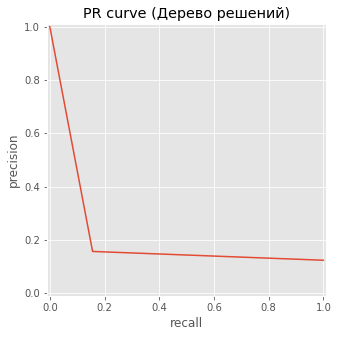

In [304]:
precisionDTC, recallDTC, thresholds = precision_recall_curve(y_test, predictDTC)
plt.figure(figsize=(5, 5))
plt.plot(recallDTC, precisionDTC)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Дерево решений)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

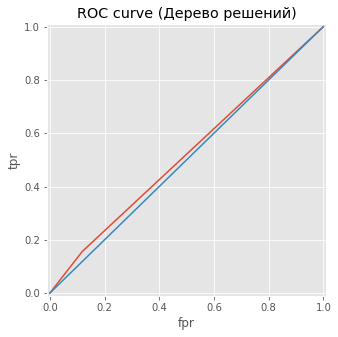

In [305]:
fprDTC, tprDTC, thresholds = roc_curve(y_test, predictDTC)

plt.figure(figsize=(5, 5))
plt.plot(fprDTC, tprDTC)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Дерево решений)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [306]:
# 2. Модель с алгоритммом "Случайный лес" - RandomForestClassifier
#------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [307]:
# Предсказанные метки
predictRFC = forest.predict(X_test) 

# Предсказанные вероятности каждого класса
predictRFC_proba = forest.predict_proba(X_test)

In [308]:
print('accurancy - ', accuracy_score(y_test, predictRFC))
print('precision - ', precision_score(y_test, predictRFC))
print('recall - ', recall_score(y_test, predictRFC))
print('f1 - ', f1_score(y_test,predictRFC))

accurancy -  0.8765366920582246
precision -  0.0
recall -  0.0
f1 -  0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(-0.01, 1.01)

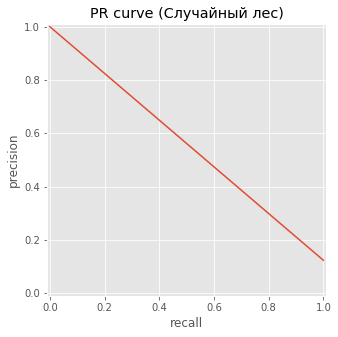

In [309]:
precisionRFC, recallRFC, thresholds = precision_recall_curve(y_test, predictRFC)

plt.figure(figsize=(5, 5))
plt.plot(recallRFC, precisionRFC)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Случайный лес)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

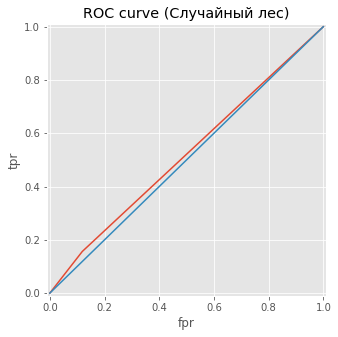

In [310]:
fprRFC, tprRFC, thresholds = roc_curve(y_test, predictDTC)

plt.figure(figsize=(5, 5))
plt.plot(fprRFC, tprRFC)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Случайный лес)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [311]:
# 3. Модель с алгоритммом "Логистическая регрессия" - LogisticRegression
#------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter=100)
lr.fit(X_train, y_train)
predictLR = lr.predict(X_test)

In [312]:
print('accurancy - ', accuracy_score(y_test, predictLR))
print('precision - ', precision_score(y_test, predictLR))
print('recall - ', recall_score(y_test, predictLR))
print('f1 - ', f1_score(y_test, predictLR))

accurancy -  0.8760841692435327
precision -  0.0
recall -  0.0
f1 -  0.0


(-0.01, 1.01)

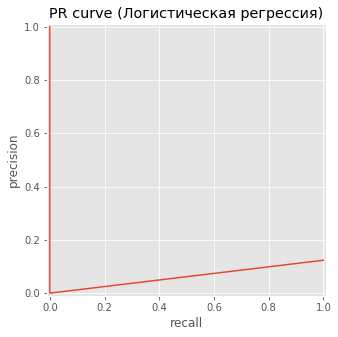

In [314]:
precisionLR, recallLR, thresholds = precision_recall_curve(y_test, predictLR)

plt.figure(figsize=(5, 5))
plt.plot(recallLR, precisionLR)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Логистическая регрессия)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

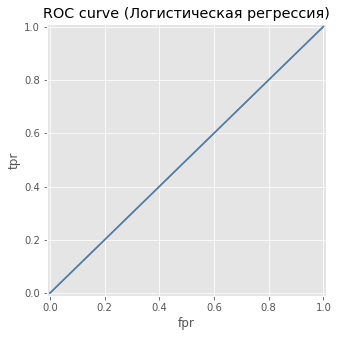

In [315]:
fprLR, tprLR, thresholds = roc_curve(y_test, predictLR)

plt.figure(figsize=(5, 5))
plt.plot(fprLR, tprLR)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Логистическая регрессия)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Получились СОВСЕМ ПЛОХИЕ РЕЗУЛЬТАТЫ !
# Наверное, причина: "True positive" - совсем маленький (в Дереве решений) или 0 (в остальных) !?

In [316]:
print('X_train - ', X_train.shape)
print('X_test - ', X_test.shape)
print('y_train - ', y_train.shape)
print('y_test - ', y_test.shape)

X_train -  (13561, 441)
X_test -  (13259, 441)
y_train -  (13561,)
y_test -  (13259,)


In [317]:
dframe = pd.DataFrame(y_test)
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13259 entries, 0 to 14909
Data columns (total 1 columns):
TARGET    13259 non-null int64
dtypes: int64(1)
memory usage: 847.2 KB


In [318]:
dframe['TARGET'].count()

13259

In [319]:
dframe.loc[
    dframe['TARGET'] == 1,
    :    
].count()

TARGET    1637
dtype: int64

In [320]:
# В тестовой целевой переменной: 1637 единиц из 13259 элементов - 12 процентов

In [ ]:
# .................
# Наверное, не правильно выбрал обучающую выборку.
# Гипотеза: в качестве обучающей надо взять данные otp_train.csv и otp_test.csv: 
# т.е. взять не df_train_preproc, df_preproc (без sample)

In [ ]:
.......to be done... 

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [ ]:
# Померить roc_auc на тесте


In [ ]:
.......to be done... 